In [4]:
import os
from zipfile import ZipFile

with ZipFile('polar-user-data-export_f1466dc1-6c87-4a66-9bbe-6080f3929501.zip', 'r') as z:
    z.extractall(path='data/')
os.chdir("data/")

In [5]:
import glob
import json
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from isodate import parse_duration

dates = []
distance = []
duration = []
duration = []
heartRate = []

for f in glob.glob("training-session-*"):
    data = json.load(open(f))
    for i in data["exercises"]:
        if i["sport"] == "TREADMILL_RUNNING":
            dates.append(pd.Timestamp(i["startTime"]))
            distance.append(i["distance"])
            duration.append(parse_duration(i["duration"]).total_seconds())
            heartRate.append(i["heartRate"]["avg"])

[]

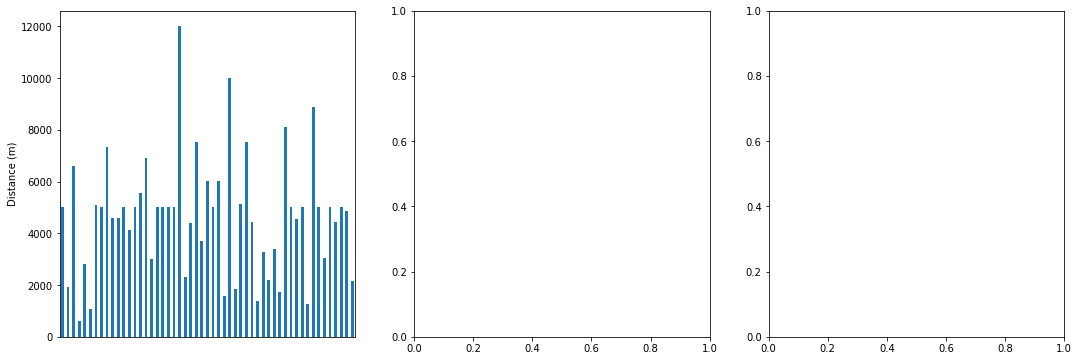

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 6, forward=True)

s = pd.Series(data=distance, index=dates)
s.plot.bar(ax=ax1)
ax1.set_ylabel("Distance (m)")
ax1.set_xticks([])

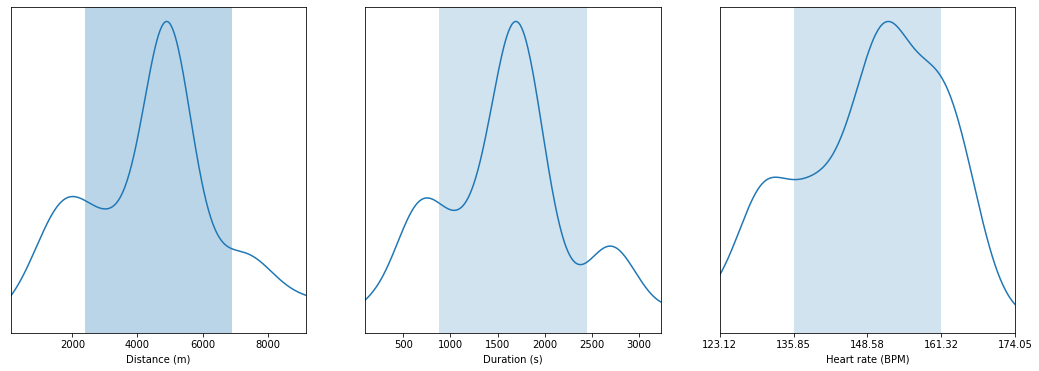

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 6, forward=True)

s = pd.Series(data=distance, index=dates)
s.plot.kde(bw_method=0.3, ax=ax1)
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("")
ax1.set_xlim(s.mean() - 2*s.std(), s.mean() + 2*s.std())
ax3.set_xticks([s.mean() - 2*s.std(), s.mean()-s.std(), s.mean(), s.mean() + s.std(), s.mean() + 2*s.std()])
ax1.set_yticks([])
ax1.axvspan(s.mean()-s.std(), s.mean()+s.std(), alpha=0.3)

s = pd.Series(data=duration, index=dates)
s.plot.kde(bw_method=0.3,ax=ax2)
ax2.set_xlabel("Duration (s)")
ax2.set_ylabel("")
ax2.set_xlim(s.mean() - 2*s.std(), s.mean() + 2*s.std())
ax3.set_xticks([s.mean() - 2*s.std(), s.mean()-s.std(), s.mean(), s.mean() + s.std(), s.mean() + 2*s.std()])
ax2.set_yticks([])
ax2.axvspan(s.mean()-s.std(), s.mean()+s.std(), alpha=0.2)

s = pd.Series(data=heartRate, index=dates)
s.plot.kde(bw_method=0.3, ax=ax3)
ax3.set_xlabel("Heart rate (BPM)")
ax3.set_ylabel("")
ax3.set_xlim(s.mean() - 2*s.std(), s.mean() + 2*s.std())
ax3.set_xticks([s.mean() - 2*s.std(), s.mean()-s.std(), s.mean(), s.mean() + s.std(), s.mean() + 2*s.std()])
ax3.set_yticks([])
ax3.axvspan(s.mean()-s.std(), s.mean()+s.std(), alpha=0.2)